# Predicting the Outcome of League of Legends Games
#### Trevor Bushnell and Ben Lombardi

## 0. Import Statements

In [1]:
import importlib

import matplotlib.pyplot as plt

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils


import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 


import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import copy
import numpy as np

In [2]:
# Initialization of classifiers
knn_clf = MyKNeighborsClassifier()
dummy_clf = MyDummyClassifier()
tree_clf = MyDecisionTreeClassifier()
nb_clf = MyNaiveBayesClassifier()

## 1. Introduction


### 1.1: What is League of Legends
League of Legends is one of the most popular MOBA (Mobile Online Battle Arena) games to date. In this game, two teams of five champions face off to destroy the other team's base. There are many different champions that you can choose from to build your team, and each champion has their own abilities. As such, there is room for a lot of strategy in League of Legends. 

Battles in League of Legends generally take a very long time - ranging anywhere from 30 to 40 minutes on average. Since these battles are so long, we are interested in finding out whether or not we can predict the outcome of a League of Legends game from data collected only from the first few minutes of a game. The results of this analysis will be able to better inform League of Legends players about early win conditions for ranked games. While the dataset that we will be using is 2 years old, the strategies and meta of League of Legends is still fairly similar. Additionally, by identifying which attributes are strong predictors of success, the results of this analysis could help Riot Games (the publisher of League) better balance the game. 



### 1.2: Overview of the Dataset
The dataset that we will be using is the [League of Legends Diamond Ranked Games (10 mins )](https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min) on kaggle. This dataset contains various different statistics such as the number of kills on each team, the amount of gold collected on each team, etc. There are roughly 10,000 games in our dataset. Since there are so many games to train on, we randomly selected 3,000 games from the dataset to keep (this way we can have a perfect 2:1 split for classification tasks). We will use the various attributes in this dataset to help us predict whether **the blue team wins or loses**. 


### 1.3: Classification Results

**WILL PUT THE CLASSIFICATION RESULTS HERE ONCE WE HAVE THEM**

## 2. Data Analysis

### 2.1: Information About the Dataset

This dataset is comprised of a csv file that contains information on the first 10 minutes of roughly 10,000 ranked games (Solo Queue) from high elo (Diamond 1 to Masters) in 2020. There are 19 attributes per team (38 total). These attributes include attributes such as average level, total gold, gold difference at 10 min, number of kills, number of deaths, number of objectives taken, and much more. If necessary we can grab more attributes for each instance with the Riot API. The attibute that we will be trying to predict is whether or not the blue team wins. This attribute takes the value of 1 if the blue team wins and 0 otherwise.

Here is the breakdown of the attributes that are in our dataset. Note that excluding gameId, each team has each of the following attributes. As such, we will only be listing each attribute once from the blue team.

* gameId: Unique RIOT ID of the game, for use with the [Riot Games API](https://developer.riotgames.com/)
* **blueWins** (class label): 1 if blue wins, 0 if blue loses
* blueWardsPlaced: Number of warding totems placed by the blue team on the map
* blueWardsDestroyed: number of enemy warding totems the blue team has destroyed
* blueFirstBlood: 1 if blue got the first kill, 0 otherwise
* blueKills: number of enemies killed by the blue team
* blueDeaths: number of deaths on the blue team
* blueAssists: number of kill assists
* blueEliteMonsters: number of elite monsters killed by the blue team
* blueDragons: number of dragons killed by the blue team
* blueHeralds: number of heralds killed by the blue team
* blueTowersDestroyed: number of structures destroyed by the blue team
* blueTotalGold: blue team's total gold
* blueAvgLevel: the average champion level
* blueTotalExperience: total experience collected by the blue team
* blueTotalMinionsKilled: total number of minions killed by the blue team
* blueTotalJungleMonstersKilled: total number of jungle monsters killed by the blue team
* blueGoldDiff: gold difference for the blue team compared to the red team. Positive means blue team has more gold, negative means that blue team has less gold
* blueExperienceDiff: experience difference for the blue team compared to the red team. Positive means blue team has more exp, negative means blue team has less exp
* blueCSPerMin: (average) number of minion deaths per minute by the blue team
* blueGoldPerMin: (average) blue team gold collected per minute

As previously mentioned, we are randomly sampling 3000 games from our 10000 games in our dataset to use for our classification tasks. In the following code cell, we import our data and randomly sample the 3000 games that we will be using for our classification tasks:

In [3]:
df = MyPyTable()
df.load_from_file("high_diamond_ranked_10min.csv")
y = df.get_column("blueWins")

X = copy.deepcopy(df.data)
# randomizing indexes to sort out a stratified sample
X_indexes = [ i for i in range(len(X))]
myutils.randomize_in_place(X_indexes,y,0)
grouped_X =[]
grouped_y = []
for i in range(len(X)):
    if grouped_y.count(y[i]) >0:
        grouped_X[grouped_y.index(y[i])].append(X_indexes[i])
    else:
        grouped_y.append(y[i])
        grouped_X.append([X_indexes[i]])
X_data = []
y_data = []
for i in range(1500):
    for j in range(len(grouped_X)):
        X_data.append(X[grouped_X[j][i]])
        y_data.append(grouped_y[j])

X = copy.deepcopy(X_data)

y = copy.deepcopy(y_data)
for entry in X:
    del entry[0]
    del entry[0]

# Let's put this additional data into our df object as well for data viz
new_data = []
for i in range(len(df.data)):
    if i in X_indexes:
        new_data.append(df.data[i])

df.data = new_data

### 2.2: Relevant Summary Statistics About the Dataset

**TO BE FILLED IN**

### 2.3: Data Visualizations

The following are some graphs that help us identify some interesting relationships in our dataset. To begin, let's sort the data into TWO tables with all the data of blue wins and all the data of red wins:

In [4]:
blue_wins_table = []
blue_loses_table = []

for row in df.data:
    if row[1] == 1: # blue wins
        blue_wins_table.append(row)
    elif row[1] == 0: # red wins
        blue_loses_table.append(row)

blue_wins_df = MyPyTable(column_names=df.column_names, data=blue_wins_table)
blue_loses_df = MyPyTable(column_names=df.column_names, data=blue_loses_table)

Now that we have this, we can start drawing some graphs and see some patterns in our dataset.

#### 2.2.1: Comparing Various Attributes for Blue VS Red When Blue Wins

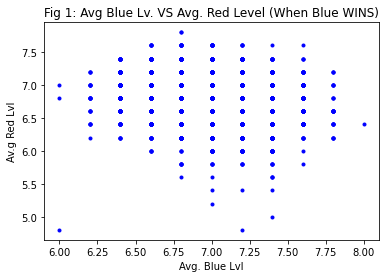

In [5]:
blue_avg_level = blue_wins_df.get_column('blueAvgLevel')
red_avg_level = blue_wins_df.get_column('redAvgLevel')

plt.plot(blue_avg_level, red_avg_level, "b.")
plt.title('Fig 1: Avg Blue Lv. VS Avg. Red Level (When Blue WINS)')
plt.xlabel('Avg. Blue Lvl')
plt.ylabel('Av.g Red Lvl')
plt.show()

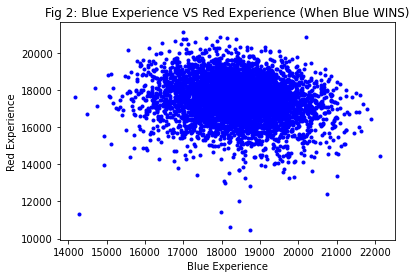

In [6]:
blue_exp = blue_wins_df.get_column('blueTotalExperience')
red_exp = blue_wins_df.get_column('redTotalExperience')

plt.plot(blue_exp, red_exp, "b.")
plt.title('Fig 2: Blue Experience VS Red Experience (When Blue WINS)')
plt.xlabel('Blue Experience')
plt.ylabel('Red Experience')
plt.show()

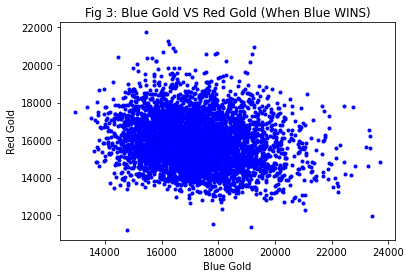

In [7]:
blue_gold = blue_wins_df.get_column('blueTotalGold')
red_gold = blue_wins_df.get_column('redTotalGold')

plt.plot(blue_gold, red_gold, "b.")
plt.title('Fig 3: Blue Gold VS Red Gold (When Blue WINS)')
plt.xlabel('Blue Gold')
plt.ylabel('Red Gold')
plt.show()

**EXPLANATION OF THESE GRAPHS TO GO HERE**

#### 2.2.2: Determining If Getting the First Kill Matters

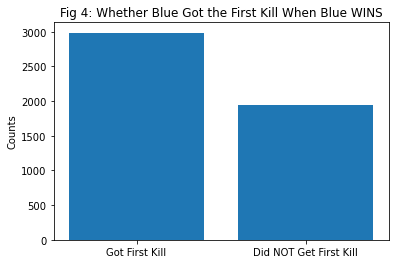

In [8]:
x = [1,2]
counts = [0,0]
for row in blue_wins_df.data:
    if row[4] == 1:
        counts[0] += 1
    elif row[4] == 0:
        counts[1] += 1

plt.bar(np.arange(len(x)), counts)
plt.xticks(np.arange(len(x)), ['Got First Kill', 'Did NOT Get First Kill'])
plt.ylabel('Counts')
plt.title('Fig 4: Whether Blue Got the First Kill When Blue WINS')
plt.show()

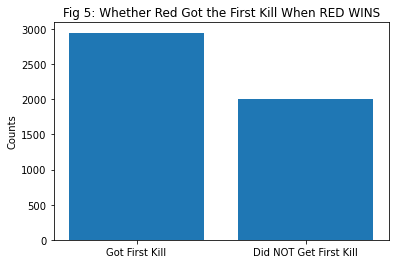

In [9]:
x = [1,2]
counts = [0,0]
for row in blue_loses_df.data:
    if row[23] == 1:
        counts[0] += 1
    elif row[23] == 0:
        counts[1] += 1

plt.bar(np.arange(len(x)), counts)
plt.xticks(np.arange(len(x)), ['Got First Kill', 'Did NOT Get First Kill'])
plt.ylabel('Counts')
plt.title('Fig 5: Whether Red Got the First Kill When RED WINS')
plt.show()

**COMMENTS ABOUT THESE GRAPHS WILL GO HERE**

#### 2.2.3: Calculating and Plotting the Kill/Death Ratio

To help have a better measure for death on both teams, we will calculate the KD ratio. This statistic is very simple and can be calculated likeso:

$$
KD = \frac{\text{\# of kills}}{\text{\# of deaths}}
$$

The following code adds this new attribute for each team to the dataset:

In [10]:
header = blue_wins_df.column_names
header += ['BlueKillDeathRatio', 'RedKillDeathRatio']

blue_wins_df.column_names = header
blue_loses_df.column_names = header
print(blue_wins_df.column_names)

['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'BlueKillDeathRatio', 'RedKillDeathRatio']


In [11]:
for i in range(len(blue_wins_df.data)):
    if blue_wins_df.data[i][6] == 0:
        blue_wins_df.data[i].append(0)
    else:
        blue_wins_df.data[i].append(blue_wins_df.data[i][5]/blue_wins_df.data[i][6])

for i in range(len(blue_wins_df.data)):
    if blue_wins_df.data[i][25] == 0:
        blue_wins_df.data[i].append(0)
    else:
        blue_wins_df.data[i].append(blue_wins_df.data[i][24]/blue_wins_df.data[i][25])

for i in range(len(blue_loses_df.data)):
    if blue_loses_df.data[i][6] == 0:
        blue_loses_df.data[i].append(0)
    else:
        blue_loses_df.data[i].append(blue_loses_df.data[i][5]/blue_loses_df.data[i][6])

for i in range(len(blue_loses_df.data)):
    if blue_loses_df.data[i][25] == 0:
        blue_loses_df.data[i].append(0)
    else:
        blue_loses_df.data[i].append(blue_loses_df.data[i][24]/blue_loses_df.data[i][25])

In [12]:
# We also need to do this for our X dataset
for i in range(len(X)):
    if X[i][6] == 0:
        X[i].append(0)
    else:
        X[i].append(X[i][5]/X[i][6])

for i in range(len(X)):
    if X[i][25] == 0:
        X[i].append(0)
    else:
        X[i].append(X[i][24]/X[i][25])    

Using this data, we can generate a graph comparing the KD ratio of the blue team to the KD ratio of the red team:

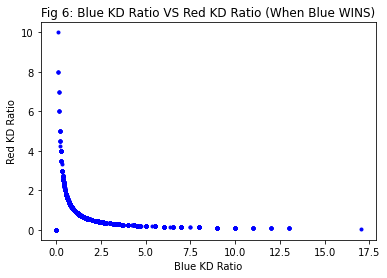

In [16]:
blue_kd_ratio = blue_wins_df.get_column('BlueKillDeathRatio')
red_kd_ratio = blue_wins_df.get_column('RedKillDeathRatio')

plt.plot(blue_kd_ratio, red_kd_ratio, "b.")
plt.title('Fig 6: Blue KD Ratio VS Red KD Ratio (When Blue WINS)')
plt.xlabel('Blue KD Ratio')
plt.ylabel('Red KD Ratio')
plt.show()

This graph produces a very interesting relationship: when the blue team wins and the kd ratio for the blue team increases, the kd ratio for the red team decreases. This is the strongest relationship out of all of the data that we have noticed in our data analysis.

## 3. Classification Results

### 3.1: Initial Classification

We started our classification task by getting an initial classification using the holdout method with all of the attributes in the dataset and calculating the statistics that went with it. 

In [17]:
myutils.compute_clf_stats(knn_clf,X,y,"kNN Classifier")
myutils.compute_clf_stats(dummy_clf,X,y,"Dummy Classifier")


Hold-Out Method
kNN Classifier : accuracy =  0.6909090909090909  error =  0.3090909090909091
binary precision:  0.6915322580645161
binary recall:  0.6915322580645161
f1 score:  0.6915322580645161
Confusion Matrix
[[341, 153], [153, 343]]

Hold-Out Method
Dummy Classifier : accuracy =  0.5  error =  0.5
binary precision:  0.0
binary recall:  0.0
f1 score:  0
Confusion Matrix
[[495, 0], [495, 0]]


Next, we went ahead and discretized our data. By doing this, we would be able to use a random forest classifier and a Naive Bayes classifier more effectively since our implementations of these classifiers only worked for discrete attributes.

In [18]:
# equal width binning
X = copy.deepcopy(X_data)
y = [str(value) for value in y]
for entry in X:
    del entry[0:2]
    del entry[-9:-1]
    del entry[-1]
    del entry[10:15]
    del entry[12:14]
for j in range(len(X[0])):
    binned_col = myutils.binning([row[j] for row in X])
    for i in range(len(X)):
        X[i][j] = binned_col[i]


Finally, we saw that we had lots of attributes, so we went ahead and trimmed down the number of attributes that we had so that our classifiers didn't have to work through so many attributes.

In [19]:
header = df.column_names.copy()
del header[0:2]
del header[-9:-1]
del header[-1]
del header[10:15]
del header[12:14]
print(header)

['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueGoldDiff', 'blueExperienceDiff', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed']


In [20]:
X = copy.deepcopy(X_data)

for entry in X:
    del entry[0:2]
    del entry[-9:-1]
    del entry[-1]
    del entry[10:15]
    del entry[12:14]

myutils.compute_clf_stats(knn_clf,X,y,"kNN Classifier")
myutils.compute_clf_stats(dummy_clf,X,y,"Dummy Classifier")


Hold-Out Method
kNN Classifier : accuracy =  0.6525252525252525  error =  0.3474747474747475
binary precision:  0.6583333333333333
binary recall:  0.6370967741935484
f1 score:  0.6475409836065574
Confusion Matrix
[[316, 180], [164, 330]]

Hold-Out Method
Dummy Classifier : accuracy =  0.5  error =  0.5
binary precision:  0.0
binary recall:  0.0
f1 score:  0
Confusion Matrix
[[495, 0], [495, 0]]


### 3.2: kNN Classifier

Next, we ran various kNN classifications for various values of $k$ to see what kinds of classification results we could find.

**GO ON TO DO THIS LATER**

In [21]:
# kNN with 3 neighbors
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

knn_clf = MyKNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
y_pred_knn_clf = knn_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_knn_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

Hold-Out Method
Random Forest : accuracy =  0.6525252525252525  error =  0.3474747474747475


In [22]:
# kNN with 5 neighbors
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

knn_clf = MyKNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)
y_pred_knn_clf = knn_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_knn_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

Hold-Out Method
Random Forest : accuracy =  0.6717171717171717  error =  0.3282828282828283


In [23]:
# kNN with 7 neighbors
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

knn_clf = MyKNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train,y_train)
y_pred_knn_clf = knn_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_knn_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

Hold-Out Method
Random Forest : accuracy =  0.6838383838383838  error =  0.3161616161616162


In [24]:
# kNN with 10 neighbors
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

knn_clf = MyKNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train,y_train)
y_pred_knn_clf = knn_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_knn_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

Hold-Out Method
Random Forest : accuracy =  0.7  error =  0.30000000000000004


### 3.3: Naive Bayes Classifier

We folloed up our kNN classification with some Naive Bayes classifiers in an attempt to see if our Naive Bayes would outperform our kNN classifiers (even though we had to discretize the data so that our Naive Bayes classifier would work as intended).

**DO THIS LATER**

In [25]:
# Naive Bayes classifier
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

nb_clf = MyKNeighborsClassifier(n_neighbors=3)
nb_clf.fit(X_train,y_train)
y_pred_nb_clf = nb_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_nb_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

Hold-Out Method
Random Forest : accuracy =  0.6494949494949495  error =  0.35050505050505054


### 3.4: Random Forest Classifier

We finally ended our classification process by implementing and utilizing a random forest cluster. Using our discretized data, we were able to run our random forest classifier and get the following results:

In [ ]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,5,3,3)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

In [ ]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,20,11,3)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

In [ ]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,20,7,5)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

In [ ]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,20,7,10)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

In [ ]:
X = copy.deepcopy(X_data)
y = [str(value) for value in y]
for entry in X:
    del entry[0:2]
for j in range(len(X[0])):
    binned_col = myutils.binning([row[j] for row in X])
    for i in range(len(X)):
        X[i][j] = binned_col[i]

In [ ]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)
M_vals = [10,20,20,40,50]
F_vals = [3,5,7,9,11]

for m in M_vals:
    for f in F_vals:
        forest_clf = MyRandomForestClassifier()
        forest_clf.fit(X_train,y_train,m,m//3,f)
        y_pred_clf = forest_clf.predict(X_test)

        accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
        print("Hold-Out Method: M = ", m, " N = ", m//3, " F = ", f)
        print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

In [ ]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,50,10,4)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

In [ ]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,50,11,8)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

In [ ]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,50,11,15)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

Now we seek to find a compact feature set for a predictor to deploy to the web.

In [ ]:
header = df.column_names.copy()

del header[0:8]
del header[2:9]
del header[4:]
print(header)

X = copy.deepcopy(X_data)
y = [str(value) for value in y]
for entry in X:
    del entry[0:8]
    del entry[2:9]
    del entry[4:]
for j in range(len(X[0])):
    binned_col = myutils.binning([row[j] for row in X])
    for i in range(len(X)):
        X[i][j] = binned_col[i]

In [ ]:
myutils.compute_clf_stats(knn_clf,X,y,"kNN Classifier")
myutils.compute_clf_stats(tree_clf,X,y,"Decision Tree Classifier")
myutils.compute_clf_stats(nb_clf,X,y,"Naive_Bayes Classifier")

print(tree_clf.attribute_domains)

X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)
forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,10,3,2)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print()
print("Hold-Out Method")
print("Random Forest Classifier: accuracy = ", accuracy, " error = ", 1 - accuracy)


## 4. Conclusion

**TO BE WRITTEN**